# Overview 

The purpose of this notebook is to explore cycles in SOXX. We know that the semiconductor sector is cycle because (#TODO-see Strategy book)... The intended use case of this analysis is understanding where in the cycle we are and whether we should continue to invest or stop investing for more guaranteed returns, that ideally beat the S&P500.

# Libraries

In [5]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.fftpack
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import portfolio_design.src.edhec_risk_kit as erk
import portfolio_design.src.analysis as an
import statsmodels.api as sm

from scipy import stats
from portfolio_design.src import data


ix = pd.IndexSlice

%matplotlib inline

# Data

In [13]:
asset_symbols = [
  'SOXX',
]

# Market data
asset_price_df = (
  data
    .get_monthly_market_data(asset_symbols, interval = '1mo')
)

# Asset data
returns_df = (
  data.compute_period_returns_from_mmd(asset_price_df, periods = 24)
    .rename('return')
    .to_frame()
)
returns_df.index = returns_df.index + pd.DateOffset(months = -24)

[*********************100%***********************]  1 of 1 completed


# Time Series

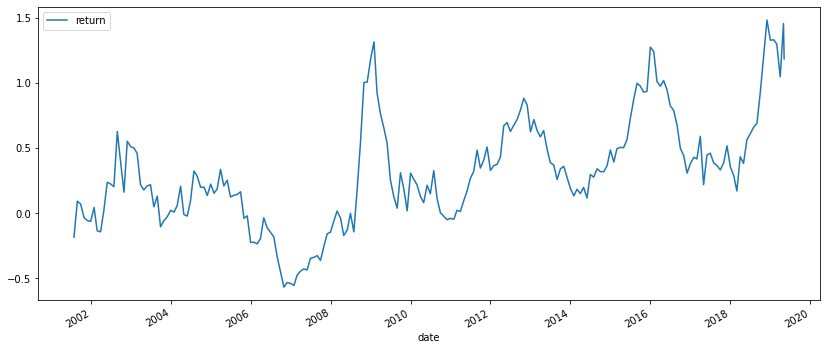

In [17]:
returns_df.plot(figsize = (14, 6));

We see a possible regular cycle emerge in 2008.

# Cycle Analysis

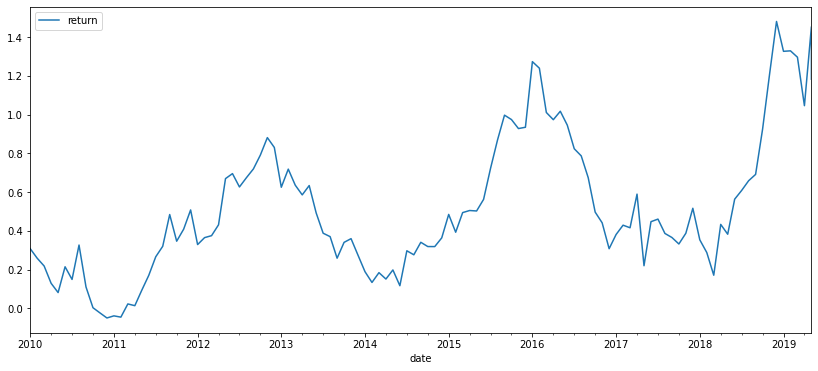

In [82]:
ts_df = returns_df.loc['2010-01-01':]
ts_df.index = pd.DatetimeIndex(ts_df.index).to_period('M')
ts_df.plot(figsize = (14, 6));

In [79]:
pd.plotting.register_matplotlib_converters()


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                 return   No. Observations:                  114
Model:                    local level   Log Likelihood                  74.728
                              + cycle   AIC                           -143.456
Date:                Sun, 09 May 2021   BIC                           -135.328
Time:                        18:47:28   HQIC                          -140.159
Sample:                    01-31-2010                                         
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0039      0.001      4.021      0.000       0.002       0.006
sigma2.level         0.0068      0.002      4.429      0.000       0.004       0.010
frequency.cycle      0.1560      0.006     27.132      0.000       0.145       0.167
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.90   Prob(JB):                         0.33
Heteroskedasticity (H):               2.46   Skew:                             0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TypeError: Axis must have `freq` set to convert to Periods

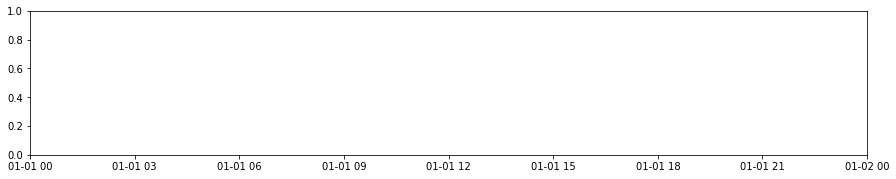

In [80]:
# restricted_model = {
#   'level': 'smooth trend', 
#   'cycle': True, 
#   'damped_cycle': True, 
#   'stochastic_cycle': True
# }
# unrestricted_model = {
#   'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

output_mod = sm.tsa.UnobservedComponents(ts_df['return'], cycle=True, level='llevel')
output_res = output_mod.fit(method='powell', disp=False)
display(output_res.summary())
fig = output_res.plot_components(legend_loc='lower right', figsize=(15, 9));

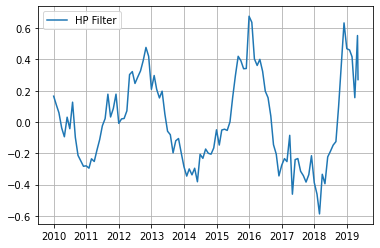

In [48]:
# plt.set(title='Cycle component')
# plot.plot(ts_df.index, res_uc.cycle.smoothed, label='UC')
# plot.plot(ts_df.index, res_ucarima.autoregressive.smoothed, label='UC-ARIMA(2,0)')
plt.plot(hp_cycle, label='HP Filter')
plt.legend(loc='upper left')
plt.grid()